In [1]:
import numpy as np
import matplotlib.pyplot as plt

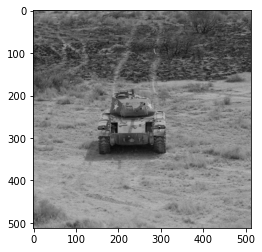

In [4]:
img1 = plt.imread("Downloads/7.1.09.tiff")
plt.imshow(img1,'gray')

In [110]:
[M,N] = img1.shape
print(M,N)

512 512


In [10]:
def avg_fil(M):
    return 1/(M**2)*np.ones((M,M))

# Question 1

In [122]:
fil = avg_fil(5)
fil

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [118]:
# DFT Calc Function
def dft_matmul(img_gray,N):
    dft_matrix = np.empty_like(img_gray, dtype = np.complex_)
    W = np.empty_like(img_gray, dtype = np.complex_)
    for i in range(N):
        for j in range(N):
            W[i,j] = np.exp(-1j*np.pi*2*j*(1/N)*i)
    dft_matrix = np.matmul(W,img_gray)
    dft_matrix = np.matmul(dft_matrix,W.T)
    return dft_matrix    

In [55]:
# Zero padding function
def zero_pad(img,N):
    [x,y] = img.shape
    p = int((N-1)/2)
    x_new = x + int(p)
    y_new = y + int(p)    
    img_new = np.zeros((x_new,y_new))
    for i in range(x_new - p):
        for j in range(y_new - p):
            img_new[i+p,j+p] = img_new[i+p,j+p] + img[i,j]
    return img_new

In [129]:
def idft_matmul(dft_matrix,N):
    idft_matrix = np.empty_like(dft_matrix, dtype = np.complex_)
    W_star = np.empty_like(dft_matrix, dtype = np.complex_)
    for i in range(N):
        for j in range(N):
            W_star[i,j] = np.exp(1j*np.pi*2*j*(1/N)*i)
    idft_matrix = np.matmul(W_star,dft_matrix)
    idft_matrix = np.matmul(idft_matrix,W_star.T)
    idft_matrix = idft_matrix/(N**2)
    return idft_matrix

In [124]:
# Perform Circular convolution
dft_img1 = dft_matmul(img1,N)
dft_fil = dft_matmul(fil,5)

In [130]:

for i in range(5):
    for j in range(5):
        dft_img1[i,j] = dft_img1[i,j]*dft_fil[i,j]
circular = np.zeros((512,512img1 = plt.imread("Downloads/7.1.09.tiff")
img1 = plt.imread("Downloads/7.1.09.tiff")
circular = idft_matmul(dft_img1,512)

The ourput of Circular Convolution with 5x5 Averaging Filter


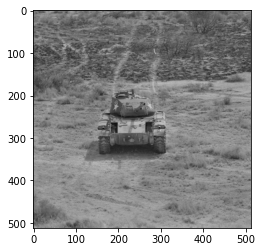

In [138]:
print('The ourput of Circular Convolution with 5x5 Averaging Filter')
plt.imshow(abs(circular),'gray')
plt.show()

In [149]:
# Zero padding function
def zero_pad(img,N):
    [x,y] = img.shape
    p = int((N-1)/2)
    x_new = x + 2*int(p)
    y_new = y + 2*int(p)    
    img_new = np.zeros((x_new,y_new))
    for i in range(x_new - 2*p):
        for j in range(y_new - 2*p):
            img_new[i+p,j+p] = img_new[i+p,j+p] + img[i,j]
    return img_new

In [150]:
# Linear Convoltion function 
def convol_2d(img,fil):
    [x,y] = img.shape
    [p,q] = fil.shape
    img_pad = zero_pad(img,p)
    [l,m] = img_pad.shape
    img_new = np.zeros((x,y),dtype = int)
    for i in range(l - (p-1)):
        for j in range(m - (q-1)):
            x = 0
            for r in range(p):
                for s in range(q):
                    x = img_pad[i+r,j+s]*fil[r,s]+x
            img_new[i,j] = int(x)
    return img_new

Linear Convolution Output


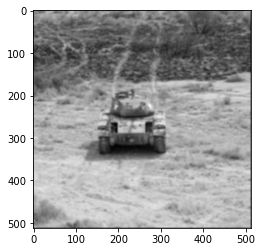

In [151]:
# Linear convolution after zero padding
img_lin_convolve = convol_2d(img1,fil)
print('Linear Convolution Output')
plt.imshow(img_lin_convolve,'gray')
plt.show()

# Question 2

In [98]:
sigma_sq = 25
fil_size = np.arange(3,15,2,dtype = int)
sd_gauss = np.arange(0.5,5,0.5,dtype = float)
[s,] = fil_size.shape
[t,] = sd_gauss.shape

In [33]:
#add awgn noise
[M,N] = img1.shape
noise = np.random.normal(0,np.sqrt(sigma_sq),(M,N))
img2 = plt.imread("Downloads/7.1.09.tiff")
img2 = img2+noise

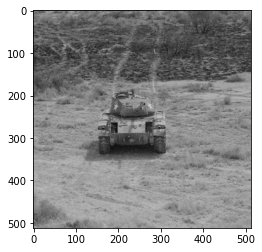

In [35]:
plt.imshow(img2,'gray')

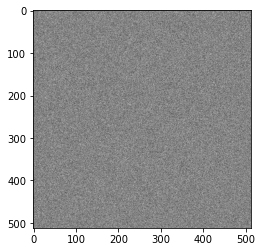

In [106]:
img3 = img2-img1
plt.imshow(img3,'gray')

In [145]:
# Zero padding function
def zero_pad(img,N):
    [x,y] = img.shape
    p = int((N-1)/2)
    x_new = x + 2*int(p)
    y_new = y + 2*int(p)    
    img_new = np.zeros((x_new,y_new))
    for i in range(x_new - 2*p):
        for j in range(y_new - 2*p):
            img_new[i+p,j+p] = img_new[i+p,j+p] + img[i,j]
    return img_new
img3 = zero_pad(img2,3)
img3

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 137.02002812, 147.92326137, ..., 138.80570337,
        134.38103306,   0.        ],
       [  0.        , 112.32467306, 122.44238313, ..., 120.05962174,
        113.82965942,   0.        ],
       ...,
       [  0.        , 142.8478953 , 152.60880043, ..., 157.15381203,
        162.6919739 ,   0.        ],
       [  0.        , 158.98950126, 159.92084584, ..., 156.40797049,
        153.71076043,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [146]:
# Convoltion function 
def convol_2d(img,fil):
    [x,y] = img.shape
    [p,q] = fil.shape
    img_pad = zero_pad(img,p)
    [l,m] = img_pad.shape
    img_new = np.zeros((x,y),dtype = int)
    for i in range(l - (p-1)):
        for j in range(m - (q-1)):
            x = 0
            for r in range(p):
                for s in range(q):
                    x = img_pad[i+r,j+s]*fil[r,s]+x
            img_new[i,j] = int(x)
    return img_new


Denoised Image for filter Size 3


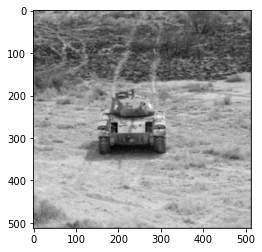

Denoised Image for filter Size 5


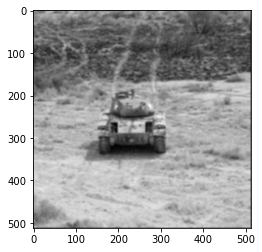

Denoised Image for filter Size 7


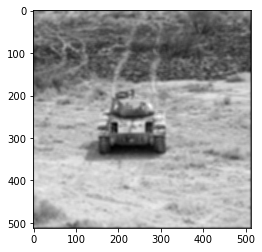

Denoised Image for filter Size 9


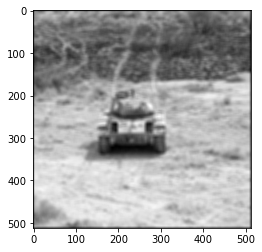

Denoised Image for filter Size 11


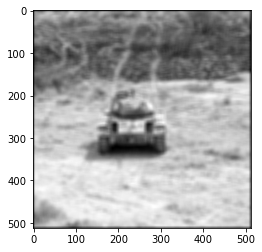

Denoised Image for filter Size 13


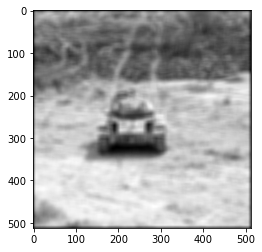

In [147]:
# Denoising for various filter size starting from 3
for i in range(s):
    n = fil_size[i]
    fil_2 = np.zeros((n,n),dtype=int)
    fil_2 = avg_fil(n)
    [M,N] = img2.shape
    img_den = convol_2d(img2,fil_2)
    print('Denoised Image for filter Size',n)
    plt.imshow(img_den,'gray')
    plt.show()
            
            
    

Apppropriate Window size is : 3

In [96]:
#Gausian filter
def matlab_style_gauss2D(shape,sigma):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

Desnoised Filter Ouptut with Gaussian Filter sigma = 0.5


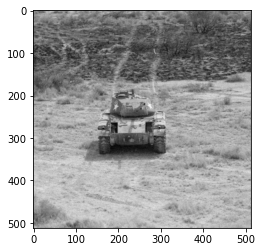

Desnoised Filter Ouptut with Gaussian Filter sigma = 1.0


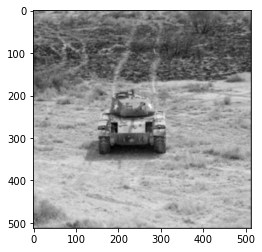

Desnoised Filter Ouptut with Gaussian Filter sigma = 1.5


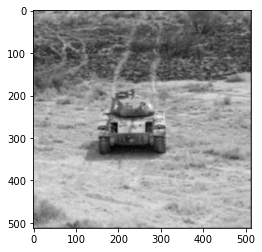

Desnoised Filter Ouptut with Gaussian Filter sigma = 2.0


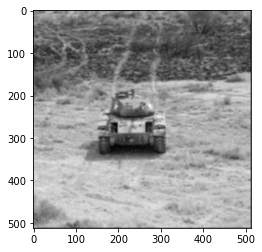

Desnoised Filter Ouptut with Gaussian Filter sigma = 2.5


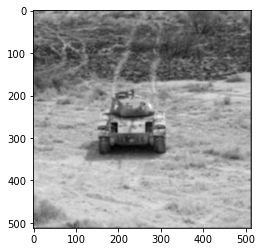

Desnoised Filter Ouptut with Gaussian Filter sigma = 3.0


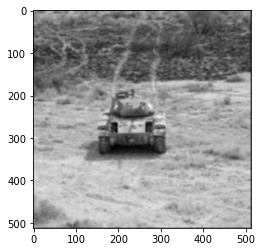

Desnoised Filter Ouptut with Gaussian Filter sigma = 3.5


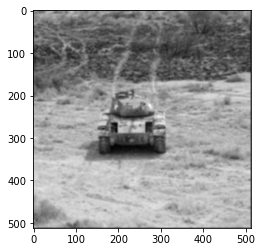

Desnoised Filter Ouptut with Gaussian Filter sigma = 4.0


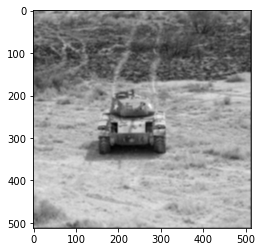

Desnoised Filter Ouptut with Gaussian Filter sigma = 4.5


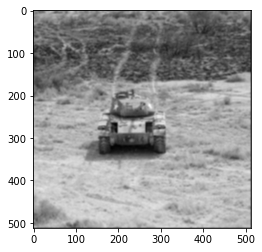

In [148]:
for i in range(t):
    sd = sd_gauss[i]
    gauss_fil = matlab_style_gauss2D((5,5),sd)
    img_den = convol_2d(img2,gauss_fil)
    print('Desnoised Filter Ouptut with Gaussian Filter sigma =',sd)
    plt.imshow(img_den,'gray')
    plt.show()
    

We can see that densoising effect is max when sigma = 0.5

# Question 3

In [154]:
from PIL import Image

def q31(img1, img2):
  if(img1.size != img2.size):
    print("image dimensions are not equal")
    exit()
  width, height = img1.shape
  max_pixel_val = np.max([np.amax(img1), np.amax(img2)])
  sum = 0
  for i in range(0, width):
   for j in range(0, height):
    sum = sum + (img1[i, j] - img2[i, j])*(img1[i, j] - img2[i, j])
  mse = sum/(width*height)
  if(mse != 0):
    psnr = 20*np.log10(max_pixel_val/mse)
  else:
    psnr = "can't be calculated due to MSE being zero"
  print("MSE : {} || PSNR : {}".format(mse, psnr))



def q32(img1, img2):
  gaussian_size = 11
  gaussian_sigma = 1.5
  temp = np.arange(-(gaussian_size // 2), (gaussian_size // 2) + 1)
  temp = np.exp(-(temp**2) / (2 * (gaussian_sigma)**2))
  gaussian_window = np.array((temp)/np.sum(temp)).reshape((gaussian_size, 1))
  # print(gaussian_window.shape)
  gaussian_kernel = np.dot(gaussian_window, gaussian_window.T)
  # print(gaussian_kernel)

  C1 = (0.01*255)*(0.01*255)
  C2 = (0.03*255)*(0.03*255)
  
  mu1 = convol_2d(img1, gaussian_kernel)
  mu2 = convol_2d(img2, gaussian_kernel)
  sigma1 = convol_2d(img1 * img1, gaussian_kernel) - mu1*mu1
  sigma2 = convol_2d(img2 * img2, gaussian_kernel) - mu2*mu2
  sigma12 = convol_2d(img1 * img2, gaussian_kernel) - mu1*mu2
  ssim = ((2*mu1*mu2 + C1) * (2*sigma12 + C2))/((mu1*mu1 + mu2*mu2 + C1) * (sigma1*sigma1 + sigma2*sigma2 + C2))
  plt.imshow(ssim)
  plt.show()
  return np.mean(ssim)

MSE : 255.63990996170446 || PSNR : -0.22858617638063447


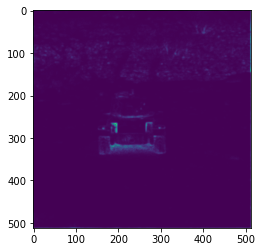

ssim : 9.208656870863382e-06
MSE : 255.63990996170443 || PSNR : -0.19377294485460778


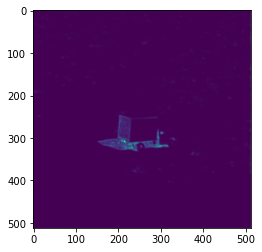

ssim : 2.4028983637298492e-05
MSE : 255.63990996170452 || PSNR : 0.43988895759987867


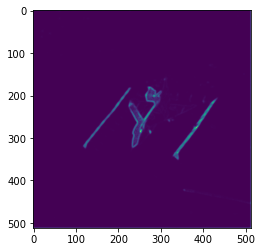

ssim : 3.131760272143117e-06


In [155]:
img1 = plt.imread("Downloads/7.1.09.tiff")
img2 = plt.imread("Downloads/7.1.01.tiff")
img3 = plt.imread("Downloads/7.1.02.tiff")
noise = np.random.normal(0,16,(img1.shape[0],img1.shape[1]))
for i in [img1, img2, img3]:
    img_noise = i + noise
    q31(i, img_noise)
    print("ssim : {}".format(q32(i, img_noise)))
    

MSE : 110.01500701904297 || PSNR : 7.094948325837496


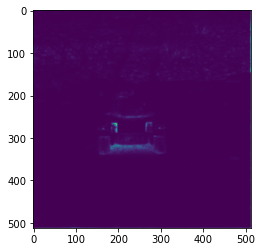

ssim : 6.479633482084327e-06
MSE : 69.03435897827148 || PSNR : 11.177494242559408


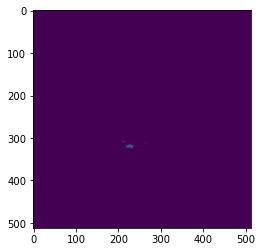

ssim : 0.0001495421144496969
MSE : 71.33338928222656 || PSNR : 10.892942988246615


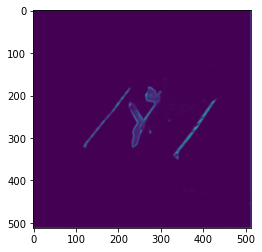

ssim : 2.491952670824898e-06


In [156]:
blur = matlab_style_gauss2D((5,5), 2)
for i in [img1, img2, img3]:
    img_noise = convol_2d(i, blur)
    q31(i, img_noise)
    print("ssim : {}".format(q32(i, img_noise)))

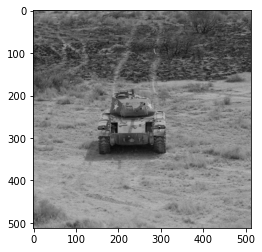

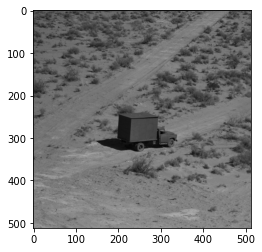

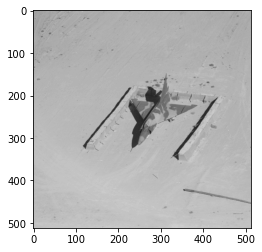

In [158]:
blur = matlab_style_gauss2D((5,5), 2)
for i in [img1, img2, img3]:
    plt.imshow(i,'gray')
    plt.show()

# Subjective Quality
Image 1 : 0.7

Image 2 : 0.9

Image 3 : 0.6